In [1]:
%load_ext autoreload
%autoreload 2
from copy import copy, deepcopy
from collections import defaultdict
from random import sample, randint
from busca.classes import ALTURAS, COLUNAS
from busca.classes.gerente import GerenteRemocao
from busca.classes.patio import Container, Pilha, Patio

from busca.utils import gera_agendamento_containers, gera_containers_transito
from busca.utils.simulador import Simulador


In [30]:
results = dict()
for perc in [.1, .7]:
    sub_results = defaultdict(list)
    simulador = Simulador()
    simulador.generate_env()
    for mode_in in ['like', 'nenhum']:
        for turns in [60]:
            for tamanho_fila in [10, 20, 30, 40, 50]:
                lsimulador = deepcopy(simulador)
                lsimulador.initialize_gerente(mode=mode_in)
                lsimulador.turns = turns
                lsimulador.tamanho_fila = tamanho_fila
                media = lsimulador.run_monte_carlo(mode_in=mode_in)
                sub_results[mode_in].append((turns, tamanho_fila, media))
    results[perc] = sub_results

Modo like
Média de remoções: 1.5309126984126986
Total gatein: 600 gateout:495
Modo like
Média de remoções: 3.056518363530748
Total gatein: 1200 gateout:989
Modo like
Média de remoções: 4.060982317703582
Total gatein: 1800 gateout:1471
Modo like
Média de remoções: 4.84025983081246
Total gatein: 2400 gateout:1999
Modo like
Média de remoções: 4.661088250478967
Total gatein: 3000 gateout:2179
Modo nenhum
Média de remoções: 1.1688888888888889
Total gatein: 600 gateout:422
Modo nenhum
Média de remoções: 2.20863596270717
Total gatein: 1200 gateout:794
Modo nenhum
Média de remoções: 2.97501624187906
Total gatein: 1800 gateout:1223
Modo nenhum
Média de remoções: 4.006030596782531
Total gatein: 2400 gateout:1481
Modo nenhum
Média de remoções: 4.665605494546037
Total gatein: 3000 gateout:2200
Modo like
Média de remoções: 1.2873611111111112
Total gatein: 600 gateout:430
Modo like
Média de remoções: 2.4707761437908493
Total gatein: 1200 gateout:797
Modo like
Média de remoções: 2.7744880952380955
To

In [31]:
print(results)

{0.1: defaultdict(<class 'list'>, {'like': [(60, 10, 1.5309126984126986), (60, 20, 3.056518363530748), (60, 30, 4.060982317703582), (60, 40, 4.84025983081246), (60, 50, 4.661088250478967)], 'nenhum': [(60, 10, 1.1688888888888889), (60, 20, 2.20863596270717), (60, 30, 2.97501624187906), (60, 40, 4.006030596782531), (60, 50, 4.665605494546037)]}), 0.7: defaultdict(<class 'list'>, {'like': [(60, 10, 1.2873611111111112), (60, 20, 2.4707761437908493), (60, 30, 2.7744880952380955), (60, 40, 4.314055388775783), (60, 50, 4.445489513189532)], 'nenhum': [(60, 10, 1.5596560846560847), (60, 20, 2.949554655870445), (60, 30, 3.4048768999200036), (60, 40, 5.1344447265917434), (60, 50, 4.426289805644182)]})}


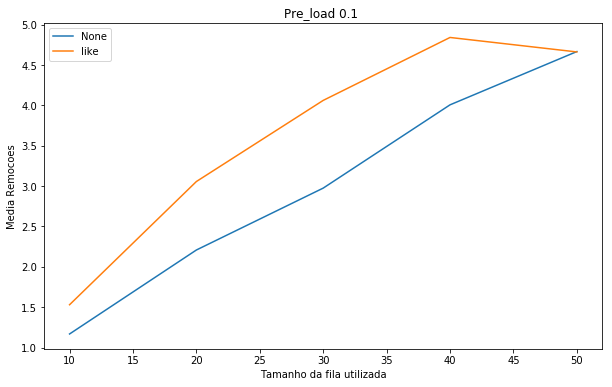

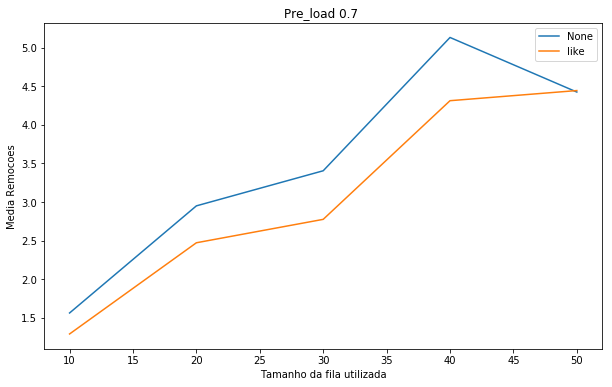

In [32]:
for perc, sub_results in results.items():
    y_none = [x[2] for x in sub_results['nenhum']]
    y_like = [x[2] for x in sub_results['like']]
    x = [x[1] for x in sub_results['like']]
    fig = plt.figure(figsize=(10, 6))
    plt.title('Pre_load %s ' % perc)
    plt.plot(x, y_none, label='None')
    plt.plot(x, y_like, label='like')
    plt.legend()
    plt.ylabel('Media Remocoes')
    plt.xlabel('Tamanho da fila utilizada')